In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

In [63]:
inc = pd.read_csv("../results_remote/output_places_US_knn_inc_vs_direct.csv")
direct = pd.read_csv("../results_remote/output_places_US_knn.csv"); 

res = pd.concat([
    inc.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    direct.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']]
])
name_map = {
    "fast_inc_NO": "Incremental",
    "fast_NO": "Direct",
    "fast_inc_deg_ratio_NO": "Incremental (on deg. ratio)",
    "fast_inc_new_NO": "Incremental (on sep. deg. ratio + AR threshold)"
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res = res[~(res['name'] == "Incremental")]
res = res[~(res['num_queries'] == 100000)]
res

,creation_time,search_time,num_queries,name
11,648599878,80266820213,500000,Incremental (on deg. ratio)
12,845562881,174633309089,1000000,Incremental (on deg. ratio)
13,2053888363,602878806961,2500000,Incremental (on deg. ratio)
14,4338244958,1359218987939,5000000,Incremental (on deg. ratio)
16,403844560,27768302986,500000,Incremental (on sep. deg. ratio + AR threshold)
17,1284700438,66647311380,1000000,Incremental (on sep. deg. ratio + AR threshold)
18,2189083277,204944034164,2500000,Incremental (on sep. deg. ratio + AR threshold)
19,4393599311,561502898491,5000000,Incremental (on sep. deg. ratio + AR threshold)
2,506099114,30244556948,500000,Direct
3,513611911,34181445922,500000,Direct


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

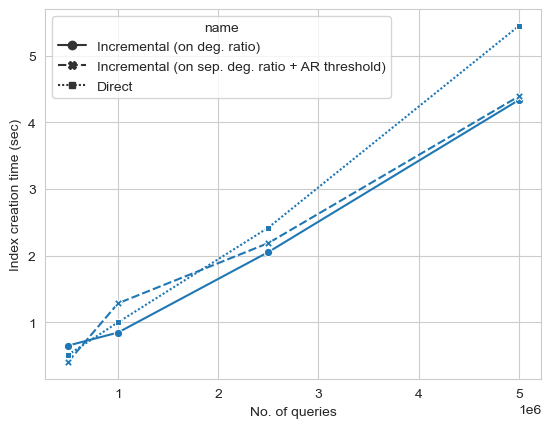

In [64]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [65]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
11,648599878,160533.640426,500000,Incremental (on deg. ratio)
16,403844560,55536.605972,500000,Incremental (on sep. deg. ratio + AR threshold)
2,506099114,60489.113896,500000,Direct
3,513611911,68362.891844,500000,Direct


In [66]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
13,2053888363,602878806961,2500000,Incremental (on deg. ratio)
18,2189083277,204944034164,2500000,Incremental (on sep. deg. ratio + AR threshold)
6,2501672940,203616863926,2500000,Direct
7,2341089073,243533633079,2500000,Direct


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (ms)'>

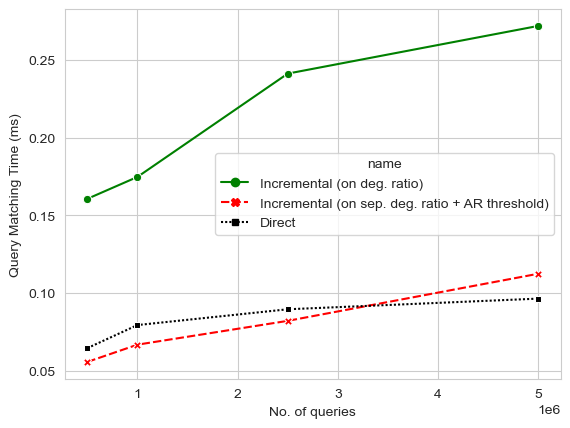

In [71]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar=None, palette=['g', 'r', 'black'], markers=True)

In [68]:
# Optimization
# - Custom iterator
# - Circle bound calculation